In [1]:
from os import sys
sys.path.append("/meshAfterParty/")
from importlib import reload

import datajoint as dj
from pathlib import Path

import datajoint_utils as du
du = reload(du)

import time

WARNING - 2020-11-18 22:05:30,091 - trimesh_repair - Need to pip install annotationframeworkclient to repair mesh with pychunkedgraph
WARNING - 2020-11-18 22:05:30,092 - trimesh_io - Need to pip install annotationframeworkclient to use dataset_name parameters
INFO - 2020-11-18 22:05:30,280 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-18 22:05:30,281 - settings - Setting database.user to celiib
INFO - 2020-11-18 22:05:30,281 - settings - Setting database.password to newceliipass


In [2]:
import minfig
du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2020-11-18 22:05:30,292 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-18 22:05:30,294 - settings - Setting database.user to celiib
INFO - 2020-11-18 22:05:30,294 - settings - Setting database.password to newceliipass
INFO - 2020-11-18 22:05:30,375 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-11-18 22:05:30,376 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-18 22:05:30,389 - connection - Connect

Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons
Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-11-18 22:05:30,595 - settings - Setting enable_python_native_blobs to True


# Investigating Decimation table

In [ ]:
(schema.jobs & "table_name='__decimation'" & "timestamp > '2020-11-16 08:00:00'")#.delete()#.fetch("status")

In [3]:
len(minnie.Decimation & minnie.SegToDecimateFromNuclei()) - 39348

81428

In [83]:
np.exp(12)*0.25

40688.69785475098

In [76]:
(minnie.Decimation() & minnie.SegToDecimateFromNuclei() & "decimation_ratio=0.25" &
                 "n_vertices<10000") #& "n_vertices<40000"

segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
864691131559524855,0,0.25,24,48,=BLOB=
864691131625403045,0,0.25,11,18,=BLOB=
864691131771477291,0,0.25,4,4,=BLOB=
864691131834277640,0,0.25,12,20,=BLOB=
864691131868306405,0,0.25,4,4,=BLOB=
864691131881790489,0,0.25,18,32,=BLOB=
864691131906133483,0,0.25,30,56,=BLOB=
864691131927301557,0,0.25,4,4,=BLOB=
864691131953361537,0,0.25,8,12,=BLOB=
864691131956238489,0,0.25,5,6,=BLOB=


In [77]:
mid_sized_segments = (minnie.Decimation() & minnie.SegToDecimateFromNuclei() & "decimation_ratio=0.25" &
                 "n_vertices>40000" #& "n_vertices<40000"
                     ).fetch("segment_id")

(array([1.11404e+05, 2.20500e+03, 2.04000e+02, 3.90000e+01, 1.60000e+01,
        9.00000e+00, 2.00000e+00, 0.00000e+00, 5.00000e+00, 1.00000e+00]),
 array([4.0000000e+00, 1.7619720e+06, 3.5239400e+06, 5.2859080e+06,
        7.0478760e+06, 8.8098440e+06, 1.0571812e+07, 1.2333780e+07,
        1.4095748e+07, 1.5857716e+07, 1.7619684e+07]),
 <BarContainer object of 10 artists>)

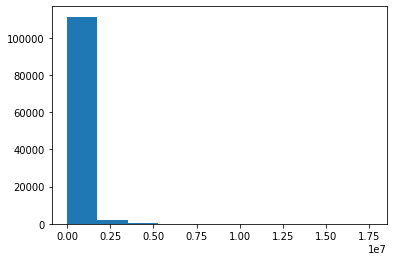

In [12]:
import matplotlib.pyplot as plt
plt.hist(n_vertices)

In [73]:
import numpy as np
np.sum(n_vertices<100)/len(n_vertices)

0.003477191904113799

In [21]:
minnie.SegToDecimateFromNuclei() & "segment_id=864691133433963620"

segment_id segment id for those to be decimated
864691133433963620


In [37]:
np.exp(12)*0.25

40688.69785475098

In [55]:
len(mid_sized_segments)

76469

In [86]:
minnie.BaylorSegmentCentroid.delete()

INFO - 2020-11-18 23:59:44,205 - connection - Transaction started


About to delete:
`microns_minnie65_02`.`__baylor_segment_centroid`: 144816 items
Proceed? [yes, No]: yes


INFO - 2020-11-19 00:00:05,705 - connection - Transaction committed and closed.


Committed.


In [81]:
import neuron_visualizations as nviz
curr_seg_id = mid_sized_segments[17]
print(f"segment = {curr_seg_id}")

new_mesh = du.fetch_segment_id_mesh(curr_seg_id)
print(f"mesh = {new_mesh}")
nviz.plot_objects(new_mesh)

INFO - 2020-11-18 23:12:19,993 - settings - Setting enable_python_native_blobs to True


segment = 864691134862564098


INFO - 2020-11-18 23:12:20,403 - settings - Setting enable_python_native_blobs to True


mesh = <trimesh.Trimesh(vertices.shape=(48622, 3), faces.shape=(98473, 3))>


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [80]:
minnie,_ = du.configure_minnie_vm()
minnie.NucleusID()

INFO - 2020-11-18 23:09:35,643 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-18 23:09:36,025 - settings - Setting enable_python_native_blobs to True


nucleus_id id of segmented nucleus,nucleus_version segmentation version,segment_id segment_id merged to nucleus,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),size (EM voxels) scaled by (4x4x40),svid supervoxel_id of centroid
996,0,0,60464,93616,20968,214525,0
996,1,0,60464,93616,20968,214525,0
996,2,0,60464,93616,20968,214525,0
996,3,0,60464,93616,20968,214525,0
1833,0,0,56800,97280,19929,219324,0
1833,1,0,56800,97280,19929,219324,0
1833,2,0,56800,97280,19929,219324,0
1833,3,0,56800,97280,19929,219324,0
1841,0,0,57536,105584,19883,1621008,0
1841,1,0,57536,105584,19883,1621008,0


In [23]:
minnie.BaylorSegmentCentroid()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,soma_vertices array of vertices,soma_faces array of faces,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,run_time the amount of time to run (seconds)
864691134649778727,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,21.250221967697144
864691134697247994,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,35.63019013404846
864691134718953212,0,0.25,1,350351,133369,23770,2941,6211,=BLOB=,=BLOB=,1,0.58,1.485,6.031,26.6601
864691134721124348,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,23.13640546798706
864691134734371578,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,21.43248414993286
864691134743838460,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,61.797796964645386
864691134746633978,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,41.79931712150574
864691134748144984,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,43.76274299621582
864691134748184152,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,28.513628482818604
864691134759873880,0,0.25,0,None,None,None,0,0,=BLOB=,=BLOB=,0,nan,nan,nan,22.53495979309082
